In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("..")

import cfg

In [3]:
NOISE_LEVELS = noise_levels = cfg.experiment.noise_levels; NOISE_LEVELS

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.075, 0.1  , 0.125,
       0.15 , 0.175, 0.2  , 0.9  ])

In [4]:
def mean_std(results):
    results.sort_values('noise_level_test', inplace=True)
    values = results['f1_test'].values.reshape(-1, 10)
    stds = np.std(values, axis=1)
    means = np.mean(values, axis=1)
    return means, stds

def plot_results(results, color, label, ci=True):
    grouped = results.groupby(results.noise_level_train)
    means = grouped['f1_test'].mean()
    stds = grouped['f1_test'].std()
#     _noise_levels = noise_levels[:len(means)]
    _noise_levels = grouped.groups.keys()
    plt.plot(_noise_levels, means, color=color, label=label)
    if ci:
        plt.fill_between(_noise_levels, means - 2*stds, means + 2*stds, alpha=.25, color=color)
    plt.legend()

def plot_results_from(filepath, color, name, type_='noised', crutch=False, **kwargs):
    results = pd.read_csv(filepath)
    if type_ == 'noised':
        results = results[results['noise_level_test'] == results['noise_level_train']]
    else:
        results = results[results['noise_level_test'] == -1]
    plot_results(results, color, name, **kwargs)

# Airline Tweets (brown rove)

In [14]:
_d = pd.read_csv('../../robust-w2v/results/rove_airline-tweets_original.csv')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.7897469518145773
f1 test std: 0.004321709105124688


In [6]:
len(pd.read_csv('../../robust-w2v/results/rove_airline-tweets.csv'))

240

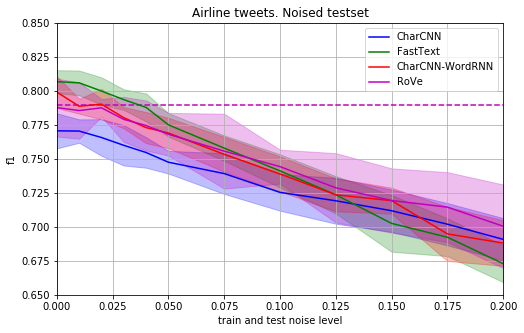

In [15]:
plt.figure(figsize=(8, 5))
plt.title('Airline tweets. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
plt.ylim(0.65, 0.85)
plot_results_from('../results/CharCNN_airline-tweets.csv_main_exp', 'b', 'CharCNN')
plot_results_from('../results/FastText_airline-tweets.csv', 'g', 'FastText')
plot_results_from('../results/YoonKim_airline-tweets.csv', 'r', 'CharCNN-WordRNN')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_airline-tweets.csv', 'm', 'RoVe')
plt.hlines(f1_mean, 0, 0.2, colors='m', linestyles='--')
plt.grid()

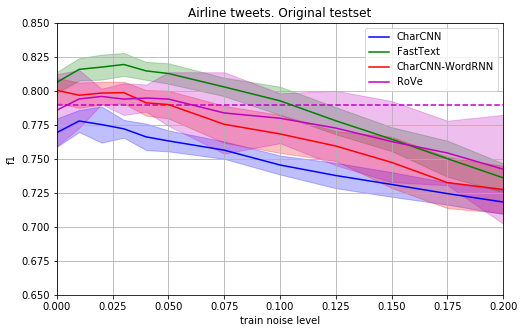

In [8]:
plt.figure(figsize=(8, 5))
plt.title('Airline tweets. Original testset')
plt.xlabel('train noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
plt.ylim(0.65, 0.85)
plot_results_from('../results/CharCNN_airline-tweets.csv_main_exp', 'b', 'CharCNN', type_='original')
plot_results_from('../results/FastText_airline-tweets.csv', 'g', 'FastText', type_='original')
plot_results_from('../results/YoonKim_airline-tweets.csv', 'r', 'CharCNN-WordRNN', type_='original')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'Attention', type_='original')
plot_results_from('../../robust-w2v/results/rove_airline-tweets.csv', 'm', 'RoVe', type_='original', crutch=True)
plt.hlines(0.79, 0, 0.2, colors='m', linestyles='--')
plt.grid()

# Airline tweets (rucorpora rove)

In [9]:
len(pd.read_csv('../../robust-w2v/results/rove_airline-tweets_rucorpora.csv'))

220

In [5]:
_d = pd.read_csv('../results/CharCNN_airline-tweets.csv_orig')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.7767086242796172
f1 test std: 0.0041367131804040235


In [7]:
_d = pd.read_csv('../results/FastText_airline-tweets.csv_orig')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.7932813104611206
f1 test std: 0.006053490689049202


In [6]:
_d = pd.read_csv('../results/YoonKim_airline-tweets.csv_orig')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.7996986643297254
f1 test std: 0.003419760169052796


In [16]:
_d = pd.read_csv('../../robust-w2v/results/rove_airline-tweets_original_rucorpora.csv')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.7928644726078877
f1 test std: 0.006409655084431594


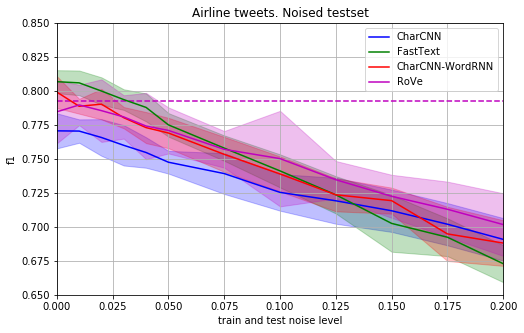

In [17]:
plt.figure(figsize=(8, 5))
plt.title('Airline tweets. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
plt.ylim(0.65, 0.85)
plot_results_from('../results/CharCNN_airline-tweets.csv_main_exp', 'b', 'CharCNN')
plot_results_from('../results/FastText_airline-tweets.csv', 'g', 'FastText')
plot_results_from('../results/YoonKim_airline-tweets.csv', 'r', 'CharCNN-WordRNN')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_airline-tweets_rucorpora.csv', 'm', 'RoVe')
plt.hlines(f1_mean, 0, 0.2, colors='m', linestyles='--')
plt.grid()

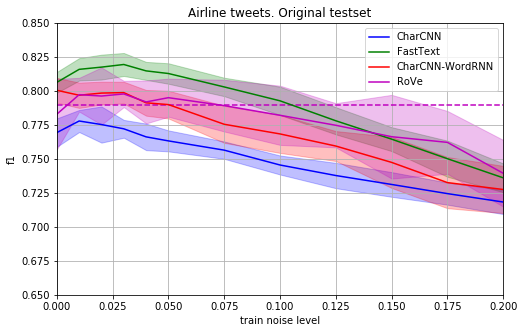

In [65]:
plt.figure(figsize=(8, 5))
plt.title('Airline tweets. Original testset')
plt.xlabel('train noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
plt.ylim(0.65, 0.85)
plot_results_from('../results/CharCNN_airline-tweets.csv_main_exp', 'b', 'CharCNN', type_='original')
plot_results_from('../results/FastText_airline-tweets.csv', 'g', 'FastText', type_='original')
plot_results_from('../results/YoonKim_airline-tweets.csv', 'r', 'CharCNN-WordRNN', type_='original')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'Attention', type_='original')
plot_results_from('../../robust-w2v/results/rove_airline-tweets_rucorpora.csv', 'm', 'RoVe', type_='original', crutch=True)
plt.hlines(0.79, 0, 0.2, colors='m', linestyles='--')
plt.grid()

# IMDB

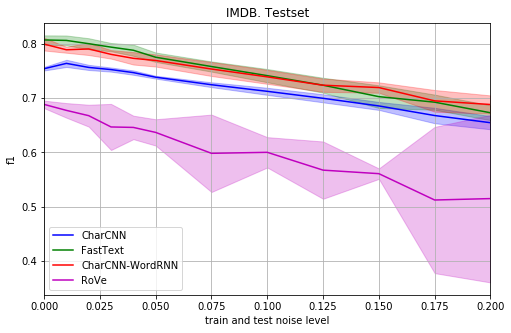

In [64]:
plt.figure(figsize=(8, 5))
plt.title('IMDB. Testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
# plt.ylim(0.65, 0.85)
plot_results_from('../results/CharCNN_IMDB.csv', 'b', 'CharCNN')
plot_results_from('../results/FastText_airline-tweets.csv', 'g', 'FastText')
plot_results_from('../results/YoonKim_airline-tweets.csv', 'r', 'CharCNN-WordRNN')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_imdb.csv', 'm', 'RoVe')
plt.grid()

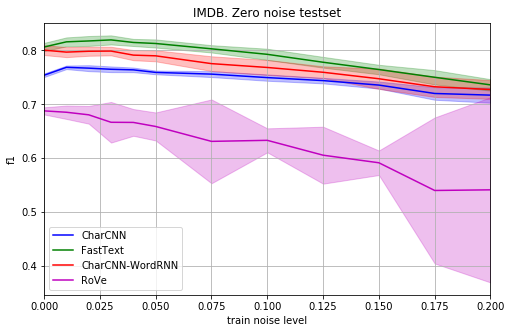

In [26]:
plt.figure(figsize=(8, 5))
plt.title('IMDB. Zero noise testset')
plt.xlabel('train noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
# plt.ylim(0.65, 0.85)
plot_results_from('../results/CharCNN_IMDB.csv', 'b', 'CharCNN', type_='original')
plot_results_from('../results/FastText_airline-tweets.csv', 'g', 'FastText', type_='original')
plot_results_from('../results/YoonKim_airline-tweets.csv', 'r', 'CharCNN-WordRNN', type_='original')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'Attention', type_='original')
plot_results_from('../../robust-w2v/results/rove_imdb.csv', 'm', 'RoVe', type_='original', crutch=True)
plt.grid()

# Rusentiment

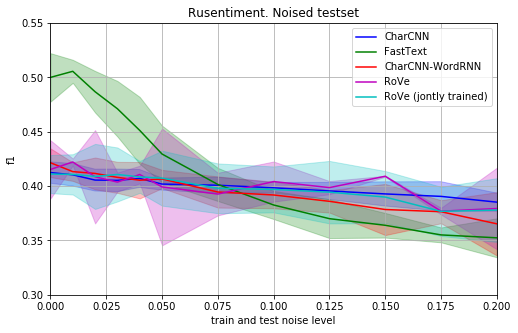

In [63]:
plt.figure(figsize=(8, 5))
plt.title('Rusentiment. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
plt.ylim(0.3, 0.55)
plot_results_from('../results/CharCNN_rusentiment.csv', 'b', 'CharCNN')
plot_results_from('../results/FastText_rusentiment.csv', 'g', 'FastText')
plot_results_from('../results/YoonKim_rusentiment.csv', 'r', 'CharCNN-WordRNN')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_rusentiment.csv', 'm', 'RoVe')
plot_results_from('../../robust-w2v/results/rove_rusentiment_jointly.csv', 'c', 'RoVe (jontly trained)')
plt.grid()

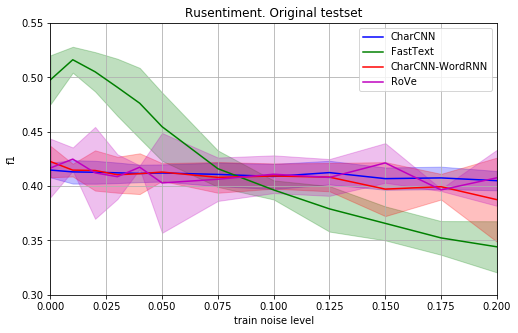

In [16]:
plt.figure(figsize=(8, 5))
plt.title('Rusentiment. Original testset')
plt.xlabel('train noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
plt.ylim(0.3, 0.55)
plot_results_from('../results/CharCNN_rusentiment.csv', 'b', 'CharCNN', type_='original')
plot_results_from('../results/FastText_rusentiment.csv', 'g', 'FastText', type_='original')
plot_results_from('../results/YoonKim_rusentiment.csv', 'r', 'CharCNN-WordRNN', type_='original')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_rusentiment.csv', 'm', 'RoVe', type_='original')
plt.grid()

In [17]:
len(pd.read_csv('../results/CharCNN_rusentiment.csv')),\
len(pd.read_csv('../results/YoonKim_rusentiment.csv')),\
len(pd.read_csv('../results/CharCNN_IMDB.csv')),\
len(pd.read_csv('../results/YoonKim_airline-tweets.csv'))

(240, 240, 1482, 240)

# SentiRuEval

In [8]:
_d = pd.read_csv('../results/CharCNN_sentirueval.csv_orig')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.3427649226481506
f1 test std: 0.005050844764229993


In [9]:
_d = pd.read_csv('../results/FastText_sentirueval.csv_orig')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.3985221485838774
f1 test std: 0.010990835420764868


In [10]:
_d = pd.read_csv('../results/YoonKim_sentirueval.csv_orig')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.3417297631383769
f1 test std: 0.008105206834064377


In [5]:
_d = pd.read_csv('../../robust-w2v/results/rove_sentirueval_original.csv')
f1_mean = _d['f1_test'].mean()
print(f"f1 test mean: {f1_mean}")
print(f"f1 test std: {_d['f1_test'].std()}")

f1 test mean: 0.35705209187566966
f1 test std: 0.007778578811174711


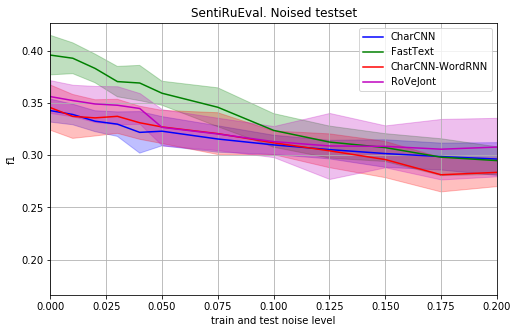

In [57]:
plt.figure(figsize=(8, 5))
plt.title('SentiRuEval. Noised testset')
plt.xlabel('train and test noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
# plt.ylim(0.8, 0.95)
plot_results_from('../results/CharCNN_sentirueval.csv', 'b', 'CharCNN')
plot_results_from('../results/FastText_sentirueval.csv', 'g', 'FastText')
plot_results_from('../results/YoonKim_sentirueval.csv', 'r', 'CharCNN-WordRNN')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_sentirueval_standard.csv', 'm', 'RoVeJont')
plt.grid()

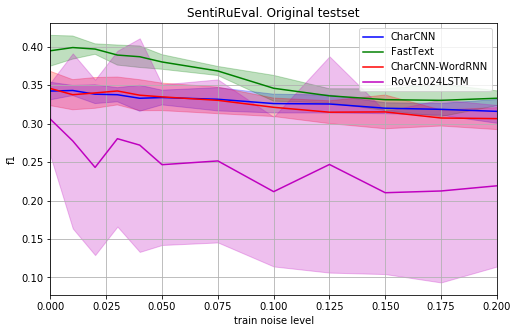

In [56]:
plt.figure(figsize=(8, 5))
plt.title('SentiRuEval. Original testset')
plt.xlabel('train noise level')
plt.ylabel('f1')
plt.xlim(0, 0.2)
# plt.ylim(0.8, 0.95)
plot_results_from('../results/CharCNN_sentirueval.csv', 'b', 'CharCNN', type_='original')
plot_results_from('../results/FastText_sentirueval.csv', 'g', 'FastText', type_='original')
plot_results_from('../results/YoonKim_sentirueval.csv', 'r', 'CharCNN-WordRNN', type_='original')
# plot_results_from('../results/AttentionedYoonKim_airline-tweets.csv', 'c', 'AttentionedYoonKim')
plot_results_from('../../robust-w2v/results/rove_sentirueval_1024_lstm.csv', 'm', 'RoVe1024LSTM', type_='original')
plt.grid()